# MuSe Dataset Analysis

**Objectives:**
1. Load and explore MuSe dataset
2. Analyze V-A-D 3D annotation distribution
3. Statistics on genres and tags
4. Compare with DEAM dataset

**Date:** December 2025  
**Data File:** `../../data/MuSe/muse_v3.csv`  
**Note:** English notebooks are in `notebooks_en/` subdirectory


## 1. Import Libraries and Setup


In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import ast
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Font settings for plots
import matplotlib
import platform

# Set font based on operating system
if platform.system() == 'Windows':
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'SimSun', 'KaiTi', 'FangSong', 'Arial Unicode MS']
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang SC', 'STHeiti', 'Heiti TC']
else:  # Linux
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'WenQuanYi Zen Hei', 'Noto Sans CJK SC']

plt.rcParams['axes.unicode_minus'] = False

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Set random seed
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print(f"Random seed: {RANDOM_STATE}")


Random seed: 42


## 2. Load Data


In [ ]:
# Set path
# Note: English notebooks are in notebooks_en/ subdirectory
DATA_FILE = Path('../../data/MuSe/muse_v3.csv')

print("=" * 70)
print("Loading MuSe Dataset")
print("=" * 70)

# Load data
df = pd.read_csv(DATA_FILE)

print(f"\nTotal rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"\nColumn names: {df.columns.tolist()}")

# Display first few rows
print("\nFirst 5 rows:")
df.head()


Loading MuSe Dataset

Total rows: 90,001
Total columns: 11

Column names: ['lastfm_url', 'track', 'artist', 'seeds', 'number_of_emotion_tags', 'valence_tags', 'arousal_tags', 'dominance_tags', 'mbid', 'spotify_id', 'genre']

First 5 rows:


,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal


## 3. Basic Data Information


In [3]:
print("=" * 70)
print("Basic Data Information")
print("=" * 70)

print(f"\nData shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)

print(f"\nMissing values statistics:")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing count': missing,
    'Missing percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing count'] > 0]
if len(missing_df) > 0:
    print(missing_df)
else:
    print("   No missing values")

# Check duplicate records
duplicates = df.duplicated(subset=['track', 'artist']).sum()
print(f"\nDuplicate records (track+artist): {duplicates}")


Basic Data Information

Data shape: (90001, 11)

Data types:
lastfm_url                 object
track                      object
artist                     object
seeds                      object
number_of_emotion_tags      int64
valence_tags              float64
arousal_tags              float64
dominance_tags            float64
mbid                       object
spotify_id                 object
genre                      object
dtype: object

Missing values statistics:
            Missing count  Missing percentage
mbid                28784               31.98
spotify_id          28371               31.52
genre                6639                7.38

Duplicate records (track+artist): 0


## 4. V-A-D 3D Annotation Analysis


In [4]:
print("=" * 70)
print("V-A-D 3D Annotation Analysis")
print("=" * 70)

# Analyze each dimension
for col in ['valence_tags', 'arousal_tags', 'dominance_tags']:
    print(f"\n{col.upper()}:")
    print(f"  Range: [{df[col].min():.2f}, {df[col].max():.2f}]")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Std: {df[col].std():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Missing: {df[col].isnull().sum()}")


V-A-D 3D Annotation Analysis

VALENCE_TAGS:
  Range: [0.23, 8.47]
  Mean: 5.45
  Std: 1.55
  Median: 5.65
  Missing: 0

AROUSAL_TAGS:
  Range: [0.11, 7.27]
  Mean: 4.32
  Std: 1.15
  Median: 4.33
  Missing: 0

DOMINANCE_TAGS:
  Range: [0.23, 7.44]
  Mean: 5.25
  Std: 1.17
  Median: 5.46
  Missing: 0


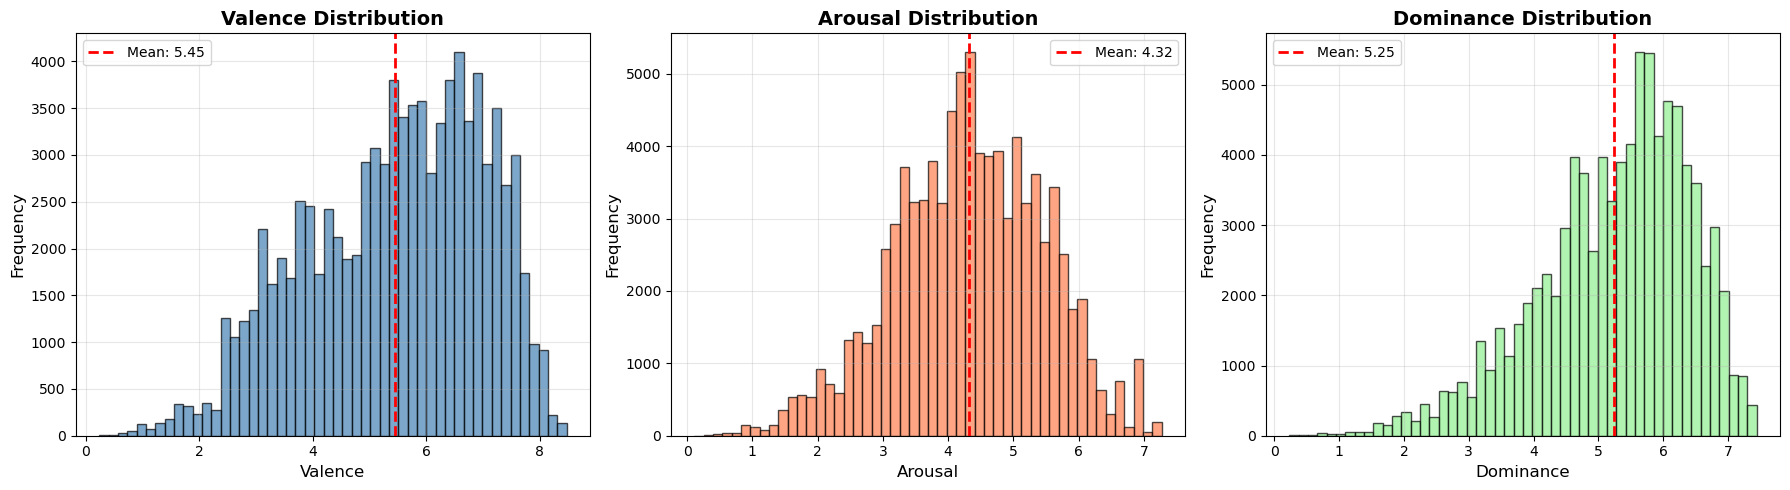

In [5]:
# Visualize V-A-D distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(df['valence_tags'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].axvline(df['valence_tags'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {df["valence_tags"].mean():.2f}')
axes[0].set_xlabel('Valence', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Valence Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].hist(df['arousal_tags'], bins=50, alpha=0.7, color='coral', edgecolor='black')
axes[1].axvline(df['arousal_tags'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {df["arousal_tags"].mean():.2f}')
axes[1].set_xlabel('Arousal', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Arousal Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

axes[2].hist(df['dominance_tags'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[2].axvline(df['dominance_tags'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {df["dominance_tags"].mean():.2f}')
axes[2].set_xlabel('Dominance', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_title('Dominance Distribution', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 5. V-A-D Correlation Analysis


V-A-D Correlation Matrix
                valence_tags  arousal_tags  dominance_tags
valence_tags        1.000000      0.405396        0.861876
arousal_tags        0.405396      1.000000        0.469441
dominance_tags      0.861876      0.469441        1.000000


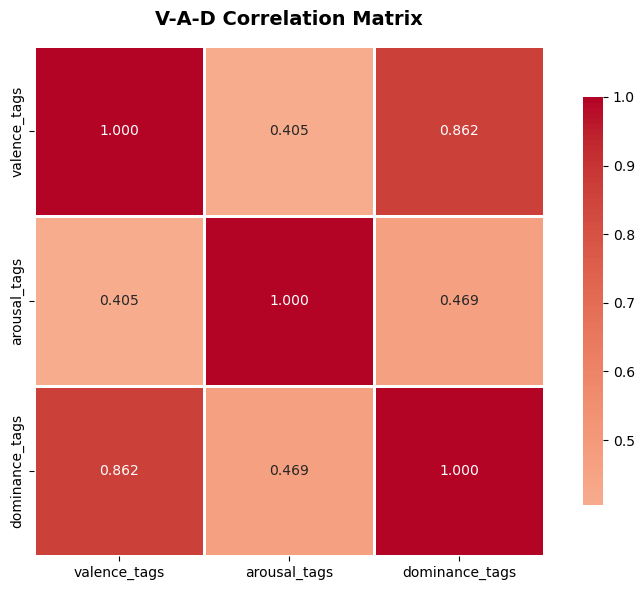


Interpretation:
  • Correlation close to 1: Strong positive correlation
  • Correlation close to -1: Strong negative correlation
  • Correlation close to 0: Almost independent


In [6]:
# Calculate V-A-D correlations
vad_cols = ['valence_tags', 'arousal_tags', 'dominance_tags']
corr_matrix = df[vad_cols].corr()

print("=" * 70)
print("V-A-D Correlation Matrix")
print("=" * 70)
print(corr_matrix)

# Visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('V-A-D Correlation Matrix', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("  • Correlation close to 1: Strong positive correlation")
print("  • Correlation close to -1: Strong negative correlation")
print("  • Correlation close to 0: Almost independent")


## 6. Sample 2000 Songs ⭐

**Purpose:** Randomly sample 2,000 songs from 90,002 songs for quick validation and feature extraction


In [7]:
# Sample 2000 songs
SAMPLE_SIZE = 2000

print("=" * 70)
print(f"Sampling {SAMPLE_SIZE} songs")
print("=" * 70)

# Random sampling
df_sampled = df.sample(n=SAMPLE_SIZE, random_state=RANDOM_STATE).reset_index(drop=True)

print(f"\nOriginal data: {len(df):,} songs")
print(f"After sampling: {len(df_sampled):,} songs")
print(f"Sampling ratio: {len(df_sampled)/len(df)*100:.2f}%")

# Save sampled data
OUTPUT_DIR = Path('../data/MuSe/processed')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

output_file = OUTPUT_DIR / f'muse_sampled_{SAMPLE_SIZE}.csv'
df_sampled.to_csv(output_file, index=False)

print(f"\nSampled data saved: {output_file}")

# Display statistics of sampled data
print(f"\nV-A-D statistics after sampling:")
print(df_sampled[['valence_tags', 'arousal_tags', 'dominance_tags']].describe())


Sampling 2000 songs

Original data: 90,001 songs
After sampling: 2,000 songs
Sampling ratio: 2.22%

Sampled data saved: ..\data\MuSe\processed\muse_sampled_2000.csv

V-A-D statistics after sampling:
       valence_tags  arousal_tags  dominance_tags
count   2000.000000   2000.000000     2000.000000
mean       5.413732      4.291717        5.215467
std        1.565692      1.160652        1.197328
min        0.639737      0.688416        0.677368
25%        4.179875      3.505833        4.500000
50%        5.616910      4.290000        5.452500
75%        6.714000      5.140313        6.117633
max        8.470000      7.270000        7.440000


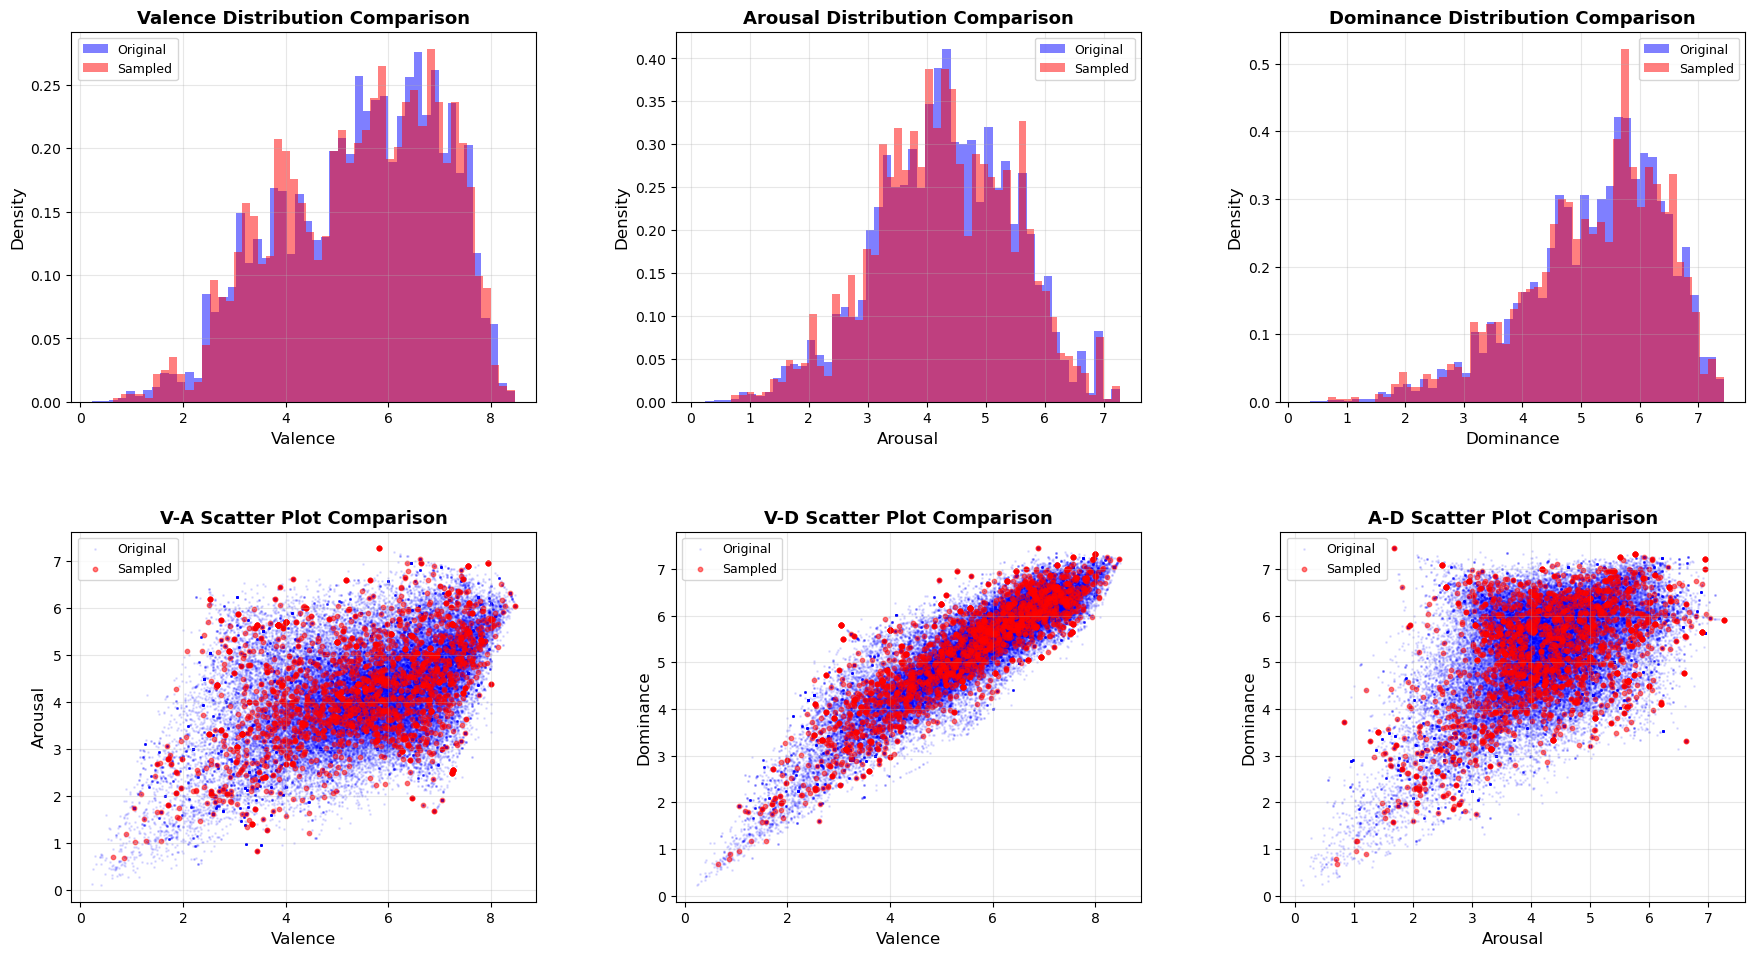

If sampled distribution is similar to original, sampling is reasonable


In [8]:
# Compare distributions before and after sampling
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.35, wspace=0.3, left=0.05, right=0.98, top=0.95, bottom=0.08)

# Valence comparison
axes[0, 0].hist(df['valence_tags'], bins=50, alpha=0.5, color='blue', label='Original', density=True)
axes[0, 0].hist(df_sampled['valence_tags'], bins=50, alpha=0.5, color='red', label='Sampled', density=True)
axes[0, 0].set_xlabel('Valence', fontsize=12)
axes[0, 0].set_ylabel('Density', fontsize=12)
axes[0, 0].set_title('Valence Distribution Comparison', fontsize=13, fontweight='bold')
axes[0, 0].legend(fontsize=9)
axes[0, 0].grid(alpha=0.3)

# Arousal comparison
axes[0, 1].hist(df['arousal_tags'], bins=50, alpha=0.5, color='blue', label='Original', density=True)
axes[0, 1].hist(df_sampled['arousal_tags'], bins=50, alpha=0.5, color='red', label='Sampled', density=True)
axes[0, 1].set_xlabel('Arousal', fontsize=12)
axes[0, 1].set_ylabel('Density', fontsize=12)
axes[0, 1].set_title('Arousal Distribution Comparison', fontsize=13, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(alpha=0.3)

# Dominance comparison
axes[0, 2].hist(df['dominance_tags'], bins=50, alpha=0.5, color='blue', label='Original', density=True)
axes[0, 2].hist(df_sampled['dominance_tags'], bins=50, alpha=0.5, color='red', label='Sampled', density=True)
axes[0, 2].set_xlabel('Dominance', fontsize=12)
axes[0, 2].set_ylabel('Density', fontsize=12)
axes[0, 2].set_title('Dominance Distribution Comparison', fontsize=13, fontweight='bold')
axes[0, 2].legend(fontsize=9)
axes[0, 2].grid(alpha=0.3)

# V-A scatter plot comparison
axes[1, 0].scatter(df['valence_tags'], df['arousal_tags'], alpha=0.1, s=1, color='blue', label='Original')
axes[1, 0].scatter(df_sampled['valence_tags'], df_sampled['arousal_tags'], alpha=0.5, s=10, color='red', label='Sampled')
axes[1, 0].set_xlabel('Valence', fontsize=12)
axes[1, 0].set_ylabel('Arousal', fontsize=12)
axes[1, 0].set_title('V-A Scatter Plot Comparison', fontsize=13, fontweight='bold')
axes[1, 0].legend(fontsize=9)
axes[1, 0].grid(alpha=0.3)

# V-D scatter plot comparison
axes[1, 1].scatter(df['valence_tags'], df['dominance_tags'], alpha=0.1, s=1, color='blue', label='Original')
axes[1, 1].scatter(df_sampled['valence_tags'], df_sampled['dominance_tags'], alpha=0.5, s=10, color='red', label='Sampled')
axes[1, 1].set_xlabel('Valence', fontsize=12)
axes[1, 1].set_ylabel('Dominance', fontsize=12)
axes[1, 1].set_title('V-D Scatter Plot Comparison', fontsize=13, fontweight='bold')
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(alpha=0.3)

# A-D scatter plot comparison
axes[1, 2].scatter(df['arousal_tags'], df['dominance_tags'], alpha=0.1, s=1, color='blue', label='Original')
axes[1, 2].scatter(df_sampled['arousal_tags'], df_sampled['dominance_tags'], alpha=0.5, s=10, color='red', label='Sampled')
axes[1, 2].set_xlabel('Arousal', fontsize=12)
axes[1, 2].set_ylabel('Dominance', fontsize=12)
axes[1, 2].set_title('A-D Scatter Plot Comparison', fontsize=13, fontweight='bold')
axes[1, 2].legend(fontsize=9)
axes[1, 2].grid(alpha=0.3)

plt.show()

print("If sampled distribution is similar to original, sampling is reasonable")


## 7. Emotion Tag Analysis


Emotion Tag Analysis

Total tags: 2,812
Unique tags: 232

TOP 20 Most Common Tags:
   1. gloomy              :   37 (1.8%)
   2. mysterious          :   31 (1.6%)
   3. cold                :   30 (1.5%)
   4. romantic            :   30 (1.5%)
   5. mystical            :   29 (1.5%)
   6. lonely              :   29 (1.5%)
   7. thoughtful          :   29 (1.5%)
   8. nocturnal           :   28 (1.4%)
   9. sweet               :   28 (1.4%)
  10. witty               :   28 (1.4%)
  11. sad                 :   27 (1.4%)
  12. eccentric           :   27 (1.4%)
  13. wistful             :   27 (1.4%)
  14. sarcastic           :   27 (1.4%)
  15. organic             :   27 (1.4%)
  16. fierce              :   27 (1.4%)
  17. sacred              :   27 (1.4%)
  18. sentimental         :   26 (1.3%)
  19. sleazy              :   26 (1.3%)
  20. sophisticated       :   26 (1.3%)


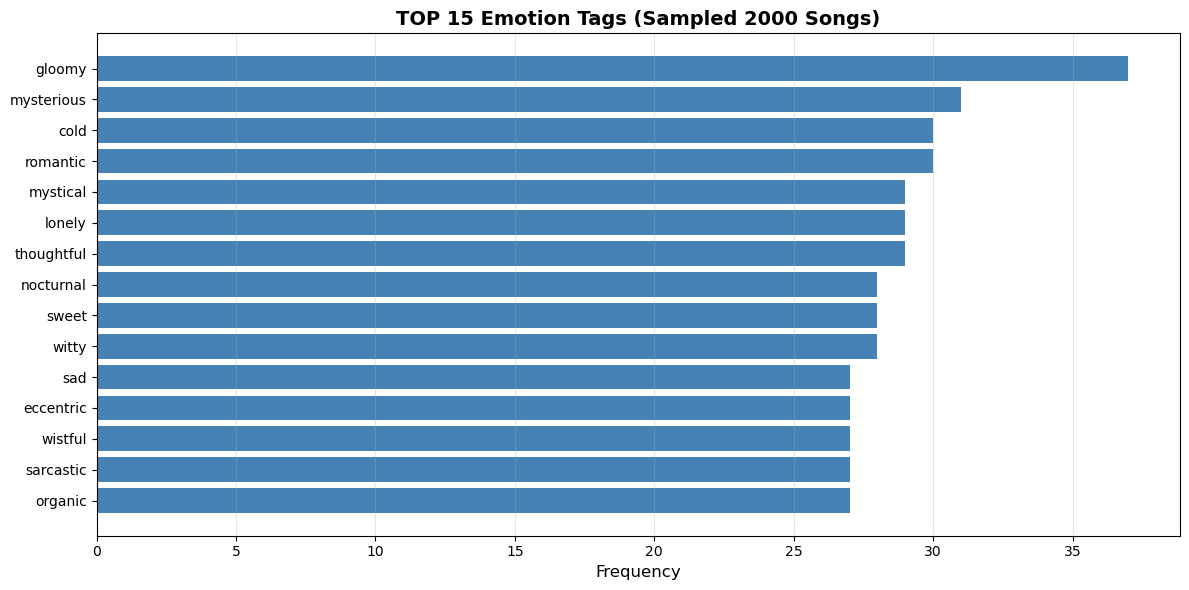

In [9]:
# Parse seeds column (emotion tags)
print("=" * 70)
print("Emotion Tag Analysis")
print("=" * 70)

# Parse tags
all_tags = []
for tags_str in df_sampled['seeds'].dropna():
    try:
        if isinstance(tags_str, str):
            tags = ast.literal_eval(tags_str)
            if isinstance(tags, list):
                all_tags.extend([tag.strip() for tag in tags if tag.strip()])
    except:
        continue

if all_tags:
    tag_counts = Counter(all_tags)
    print(f"\nTotal tags: {len(all_tags):,}")
    print(f"Unique tags: {len(tag_counts)}")
    print(f"\nTOP 20 Most Common Tags:")
    for i, (tag, count) in enumerate(tag_counts.most_common(20), 1):
        print(f"  {i:2d}. {tag:20s}: {count:4d} ({count/len(df_sampled)*100:.1f}%)")
    
    # Visualize top tags
    top_tags = dict(tag_counts.most_common(15))
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(top_tags)), list(top_tags.values()), color='steelblue')
    plt.yticks(range(len(top_tags)), list(top_tags.keys()))
    plt.xlabel('Frequency', fontsize=12)
    plt.title('TOP 15 Emotion Tags (Sampled 2000 Songs)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Unable to parse tags")


## 8. Genre Analysis


Genre Analysis (Sampled 2000 Songs)

Total genres: 231

TOP 20 Genres:
   1. indie                         : 141 (7.0%)
   2. electronic                    : 134 (6.7%)
   3. pop                           : 124 (6.2%)
   4. rock                          : 118 (5.9%)
   5. hip-hop                       :  61 (3.0%)
   6. folk                          :  58 (2.9%)
   7. ambient                       :  52 (2.6%)
   8. alternative                   :  50 (2.5%)
   9. soundtrack                    :  42 (2.1%)
  10. soul                          :  38 (1.9%)
  11. jazz                          :  35 (1.8%)
  12. experimental                  :  30 (1.5%)
  13. piano                         :  25 (1.2%)
  14. noise                         :  23 (1.1%)
  15. alternative rock              :  23 (1.1%)
  16. classic rock                  :  23 (1.1%)
  17. acoustic                      :  23 (1.1%)
  18. classical                     :  22 (1.1%)
  19. punk                          :  22 (1.1%

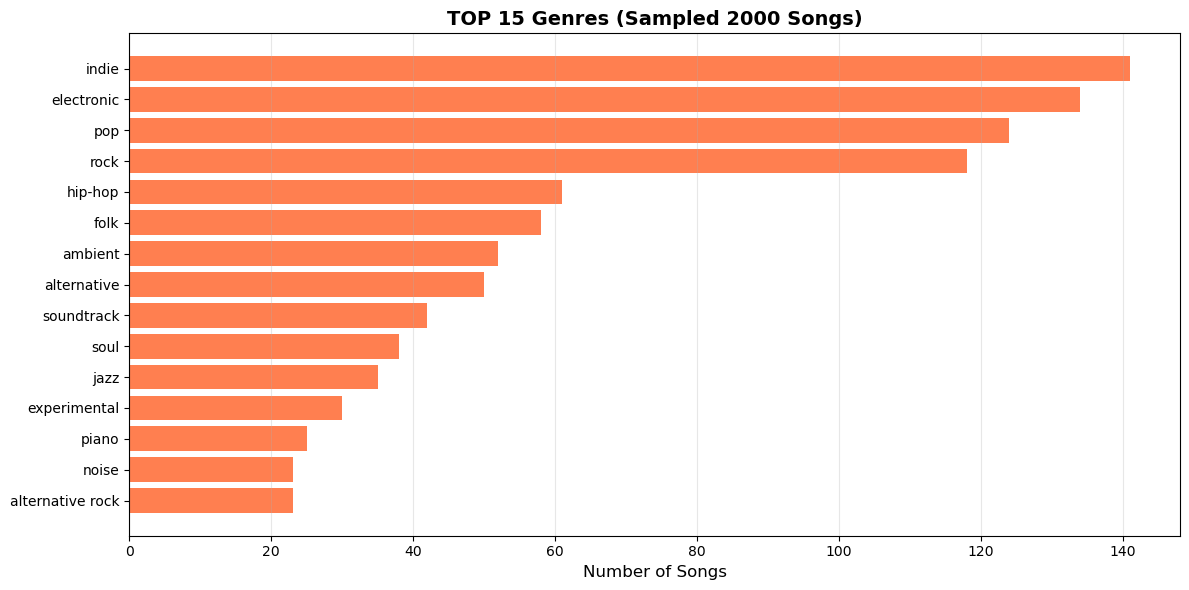


V-A-D Average by Genre (TOP 10):
             valence_tags  arousal_tags  dominance_tags
genre                                                  
alternative          5.55          4.15            5.28
ambient              5.05          3.77            4.70
electronic           5.58          4.40            5.21
folk                 5.27          3.68            5.20
hip-hop              5.50          4.35            5.40
indie                5.79          4.15            5.42
pop                  6.28          4.71            5.75
rock                 5.33          4.44            5.37
soul                 6.26          4.51            5.89
soundtrack           5.18          4.44            5.00


In [10]:
if 'genre' in df_sampled.columns:
    print("=" * 70)
    print("Genre Analysis (Sampled 2000 Songs)")
    print("=" * 70)
    
    genre_counts = df_sampled['genre'].value_counts()
    print(f"\nTotal genres: {len(genre_counts)}")
    print(f"\nTOP 20 Genres:")
    for i, (genre, count) in enumerate(genre_counts.head(20).items(), 1):
        print(f"  {i:2d}. {genre:30s}: {count:3d} ({count/len(df_sampled)*100:.1f}%)")
    
    # Visualize top genres
    top_genres = dict(genre_counts.head(15))
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(top_genres)), list(top_genres.values()), color='coral')
    plt.yticks(range(len(top_genres)), list(top_genres.keys()))
    plt.xlabel('Number of Songs', fontsize=12)
    plt.title('TOP 15 Genres (Sampled 2000 Songs)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Analyze V-A-D features by genre
    print(f"\nV-A-D Average by Genre (TOP 10):")
    top_10_genres = genre_counts.head(10).index
    genre_vad = df_sampled[df_sampled['genre'].isin(top_10_genres)].groupby('genre')[
        ['valence_tags', 'arousal_tags', 'dominance_tags']
    ].mean().round(2)
    print(genre_vad)


## 9. Artist Analysis


In [11]:
if 'artist' in df_sampled.columns:
    print("=" * 70)
    print("Artist Analysis (Sampled 2000 Songs)")
    print("=" * 70)
    
    artist_counts = df_sampled['artist'].value_counts()
    print(f"\nTotal artists: {len(artist_counts)}")
    print(f"\nTOP 20 Artists:")
    for i, (artist, count) in enumerate(artist_counts.head(20).items(), 1):
        print(f"  {i:2d}. {artist:40s}: {count:2d} songs")
    
    # Statistics on average songs per artist
    print(f"\nAverage songs per artist: {artist_counts.mean():.2f}")
    print(f"Median: {artist_counts.median():.0f}")
    print(f"Artist with most songs: {artist_counts.index[0]} ({artist_counts.iloc[0]} songs)")


Artist Analysis (Sampled 2000 Songs)

Total artists: 1713

TOP 20 Artists:
   1. Skerror                                 :  8 songs
   2. Robbie Williams                         :  6 songs
   3. Janet Jackson                           :  6 songs
   4. The Beatles                             :  6 songs
   5. Tori Amos                               :  5 songs
   6. 志方あきこ                                   :  5 songs
   7. Depeche Mode                            :  5 songs
   8. They Might Be Giants                    :  5 songs
   9. Shakira                                 :  4 songs
  10. Warren Zevon                            :  4 songs
  11. Bright Eyes                             :  4 songs
  12. The Flaming Lips                        :  4 songs
  13. Azure Ray                               :  4 songs
  14. Ulver                                   :  4 songs
  15. Lush                                    :  4 songs
  16. Radiohead                               :  4 songs
  17. Venetia

## 10. Tag Count Analysis


Emotion Tag Count Analysis (Sampled 2000 Songs)

Tag count statistics:
  Mean: 4.04
  Median: 2
  Min: 1
  Max: 40


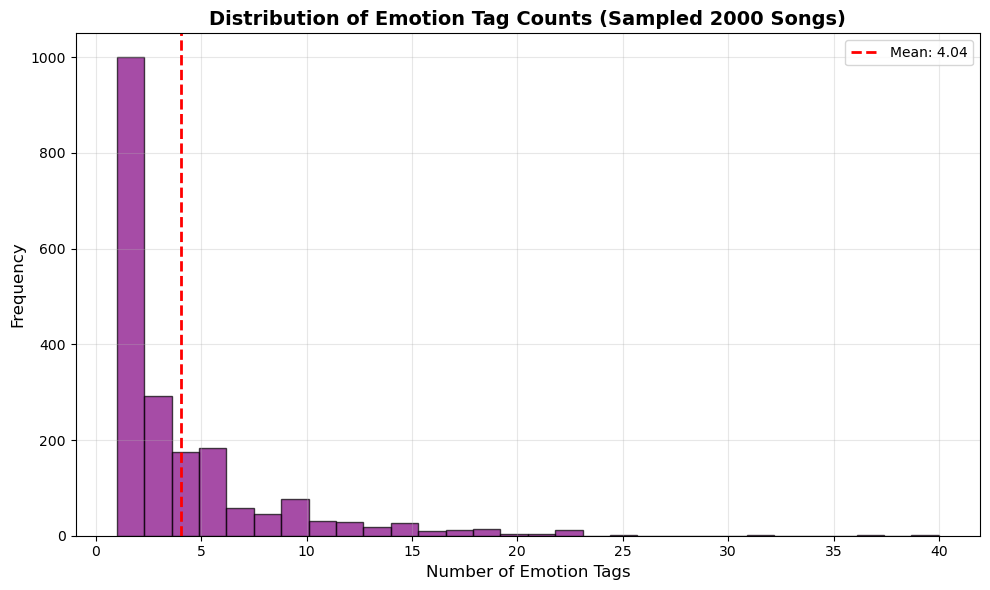

In [12]:
if 'number_of_emotion_tags' in df_sampled.columns:
    print("=" * 70)
    print("Emotion Tag Count Analysis (Sampled 2000 Songs)")
    print("=" * 70)
    
    print(f"\nTag count statistics:")
    print(f"  Mean: {df_sampled['number_of_emotion_tags'].mean():.2f}")
    print(f"  Median: {df_sampled['number_of_emotion_tags'].median():.0f}")
    print(f"  Min: {df_sampled['number_of_emotion_tags'].min():.0f}")
    print(f"  Max: {df_sampled['number_of_emotion_tags'].max():.0f}")
    
    # Visualize tag count distribution
    plt.figure(figsize=(10, 6))
    plt.hist(df_sampled['number_of_emotion_tags'], bins=30, alpha=0.7, color='purple', edgecolor='black')
    plt.axvline(df_sampled['number_of_emotion_tags'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {df_sampled["number_of_emotion_tags"].mean():.2f}')
    plt.xlabel('Number of Emotion Tags', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Distribution of Emotion Tag Counts (Sampled 2000 Songs)', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


## 11. Comparison with DEAM Dataset


MuSe vs DEAM Comparison

Dataset scale:
  MuSe (Original): 90,001 songs
  MuSe (Sampled): 2,000 songs
  DEAM: 1,802 songs

Valence comparison:
  MuSe (Sampled): [0.64, 8.47], mean=5.41
  DEAM: [1.60, 8.40], mean=4.90

Arousal comparison:
  MuSe (Sampled): [0.69, 7.27], mean=4.29
  DEAM: [1.60, 8.10], mean=4.81

Dominance (MuSe-specific):
  MuSe (Sampled): [0.68, 7.44], mean=5.22


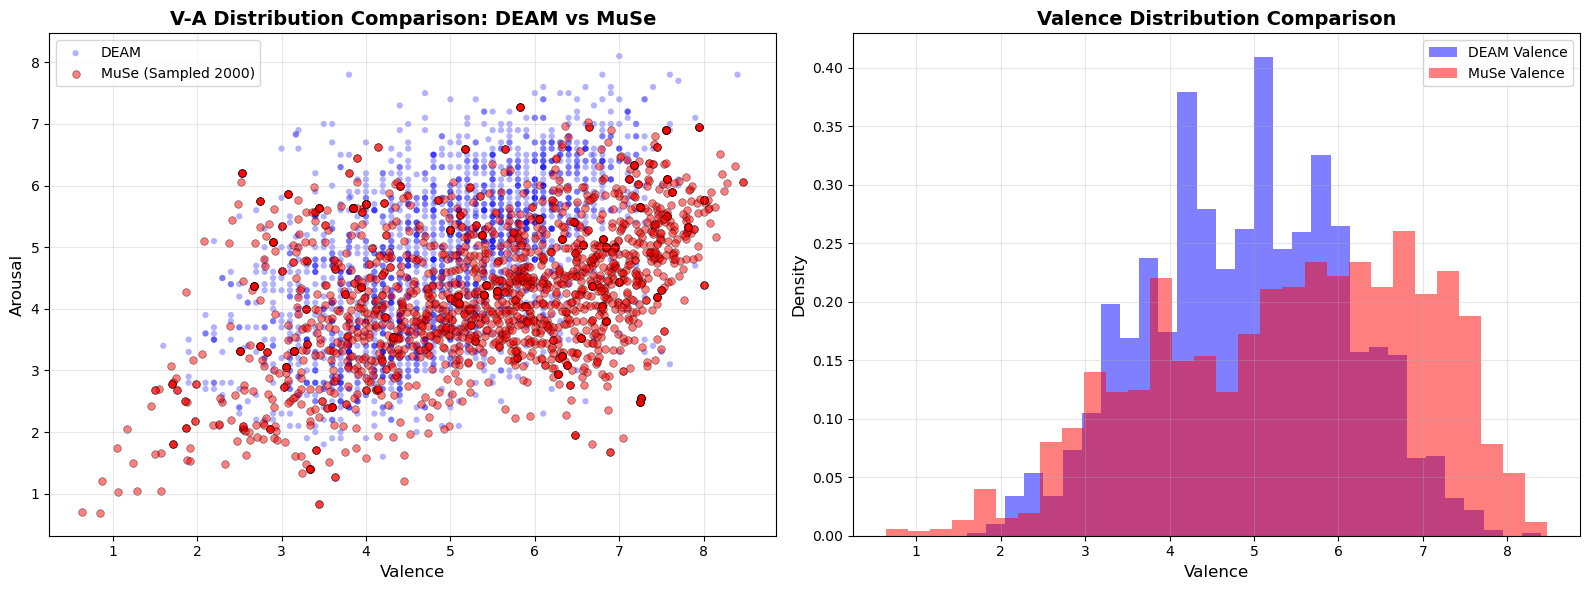

In [13]:
# Load DEAM data for comparison
try:
    deam_annotations_dir = Path('../data/DEAM/DEAM_Annotations/annotations/annotations averaged per song/song_level')
    deam_df1 = pd.read_csv(deam_annotations_dir / 'static_annotations_averaged_songs_1_2000.csv')
    deam_df2 = pd.read_csv(deam_annotations_dir / 'static_annotations_averaged_songs_2000_2058.csv')
    deam_df = pd.concat([deam_df1, deam_df2], ignore_index=True)
    deam_df.columns = deam_df.columns.str.strip()
    
    print("=" * 70)
    print("MuSe vs DEAM Comparison")
    print("=" * 70)
    
    print(f"\nDataset scale:")
    print(f"  MuSe (Original): {len(df):,} songs")
    print(f"  MuSe (Sampled): {len(df_sampled):,} songs")
    print(f"  DEAM: {len(deam_df):,} songs")
    
    print(f"\nValence comparison:")
    print(f"  MuSe (Sampled): [{df_sampled['valence_tags'].min():.2f}, {df_sampled['valence_tags'].max():.2f}], mean={df_sampled['valence_tags'].mean():.2f}")
    if 'valence_mean' in deam_df.columns:
        print(f"  DEAM: [{deam_df['valence_mean'].min():.2f}, {deam_df['valence_mean'].max():.2f}], mean={deam_df['valence_mean'].mean():.2f}")
    
    print(f"\nArousal comparison:")
    print(f"  MuSe (Sampled): [{df_sampled['arousal_tags'].min():.2f}, {df_sampled['arousal_tags'].max():.2f}], mean={df_sampled['arousal_tags'].mean():.2f}")
    if 'arousal_mean' in deam_df.columns:
        print(f"  DEAM: [{deam_df['arousal_mean'].min():.2f}, {deam_df['arousal_mean'].max():.2f}], mean={deam_df['arousal_mean'].mean():.2f}")
    
    print(f"\nDominance (MuSe-specific):")
    print(f"  MuSe (Sampled): [{df_sampled['dominance_tags'].min():.2f}, {df_sampled['dominance_tags'].max():.2f}], mean={df_sampled['dominance_tags'].mean():.2f}")
    
    # Visualize comparison
    if 'valence_mean' in deam_df.columns and 'arousal_mean' in deam_df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # V-A scatter plot comparison
        axes[0].scatter(deam_df['valence_mean'], deam_df['arousal_mean'], 
                       alpha=0.3, s=20, color='blue', label='DEAM', edgecolors='none')
        axes[0].scatter(df_sampled['valence_tags'], df_sampled['arousal_tags'], 
                       alpha=0.5, s=30, color='red', label='MuSe (Sampled 2000)', edgecolors='black', linewidth=0.5)
        axes[0].set_xlabel('Valence', fontsize=12)
        axes[0].set_ylabel('Arousal', fontsize=12)
        axes[0].set_title('V-A Distribution Comparison: DEAM vs MuSe', fontsize=14, fontweight='bold')
        axes[0].legend()
        axes[0].grid(alpha=0.3)
        
        # Distribution histogram comparison
        axes[1].hist(deam_df['valence_mean'], bins=30, alpha=0.5, color='blue', label='DEAM Valence', density=True)
        axes[1].hist(df_sampled['valence_tags'], bins=30, alpha=0.5, color='red', label='MuSe Valence', density=True)
        axes[1].set_xlabel('Valence', fontsize=12)
        axes[1].set_ylabel('Density', fontsize=12)
        axes[1].set_title('Valence Distribution Comparison', fontsize=14, fontweight='bold')
        axes[1].legend()
        axes[1].grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
except Exception as e:
    print(f"Unable to load DEAM data: {e}")
    print("   Please ensure DEAM dataset is downloaded to ../data/DEAM/ directory")


## 12. Data Quality Check


In [14]:
print("=" * 70)
print("Data Quality Check (Sampled 2000 Songs)")
print("=" * 70)

# Check if V-A-D values are in reasonable range
print(f"\nV-A-D value range check:")
for col in ['valence_tags', 'arousal_tags', 'dominance_tags']:
    min_val = df_sampled[col].min()
    max_val = df_sampled[col].max()
    print(f"  {col}: [{min_val:.2f}, {max_val:.2f}]", end="")
    if min_val < 0 or max_val > 10:
        print(" ⚠️ Out of common range")
    else:
        print(" ✅ Reasonable range")

# Check outliers using IQR method
print(f"\nOutlier check (IQR method):")
for col in ['valence_tags', 'arousal_tags', 'dominance_tags']:
    Q1 = df_sampled[col].quantile(0.25)
    Q3 = df_sampled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df_sampled[col] < lower_bound) | (df_sampled[col] > upper_bound)).sum()
    print(f"  {col}: {outliers} outliers ({outliers/len(df_sampled)*100:.2f}%)")

# Check Spotify ID availability
if 'spotify_id' in df_sampled.columns:
    spotify_available = df_sampled['spotify_id'].notna().sum()
    print(f"\nSpotify ID availability:")
    print(f"  With Spotify ID: {spotify_available}/{len(df_sampled)} ({spotify_available/len(df_sampled)*100:.1f}%)")
    print(f"  These songs can get audio via Spotify API")

# Check mbid availability
if 'mbid' in df_sampled.columns:
    mbid_available = df_sampled['mbid'].notna().sum()
    print(f"\nMusicBrainz ID availability:")
    print(f"  With mbid: {mbid_available}/{len(df_sampled)} ({mbid_available/len(df_sampled)*100:.1f}%)")


Data Quality Check (Sampled 2000 Songs)

V-A-D value range check:
  valence_tags: [0.64, 8.47] ✅ Reasonable range
  arousal_tags: [0.69, 7.27] ✅ Reasonable range
  dominance_tags: [0.68, 7.44] ✅ Reasonable range

Outlier check (IQR method):
  valence_tags: 0 outliers (0.00%)
  arousal_tags: 7 outliers (0.35%)
  dominance_tags: 30 outliers (1.50%)

Spotify ID availability:
  With Spotify ID: 1390/2000 (69.5%)
  These songs can get audio via Spotify API

MusicBrainz ID availability:
  With mbid: 1347/2000 (67.3%)


## 13. Sampled Data Preview


In [15]:
# Display sampled data preview
print("=" * 70)
print("Sampled 2000 Songs Data Preview")
print("=" * 70)

print(f"\nFirst 10 songs:")
display_cols = ['track', 'artist', 'genre', 'valence_tags', 'arousal_tags', 'dominance_tags', 'spotify_id']
available_cols = [col for col in display_cols if col in df_sampled.columns]
df_sampled[available_cols].head(10)


Sampled 2000 Songs Data Preview

First 10 songs:


,track,artist,genre,valence_tags,arousal_tags,dominance_tags,spotify_id
0,Falling In Love Again,Blackstreet,hip hop,7.353333,6.370000,6.306667,43xxANU5jlPlHj6PynW6ca
1,Blasphemer,Lucifers Crossing,metal,3.172857,4.494286,3.468571,NaN
2,Justify My Love (porno mix) Rare,Madonna,NaN,6.640000,6.950000,7.000000,NaN
3,One,Aimee Mann,soundtrack,4.683675,3.500171,5.018205,5e7OZ8PyDJYQdGAiidCPad
4,Roads Untraveled,Linkin Park,alternative rock,3.652632,3.982105,4.387368,1dYw8HTRJnFpeEeMtXj99a
5,Two Skaters,Nits,pop,2.860000,2.045000,2.555000,1N7i5FGCibqWxTBwFeeGLC
6,I'll be seeing you,Frank Sinatra,jazz,7.336214,4.502524,6.493689,7Gvf7lC6lV1x5Ul3eVePdH
7,Teen Angel,Frankie Lymon and The Teenagers,NaN,3.610000,3.010000,3.145000,NaN
8,City Theme,Vanessa-Mae,classical,6.460000,5.410000,6.950000,NaN
9,"Pedraforca, Terra De Bruixes",Narsilion,soundtrack,5.288261,4.629565,4.901304,56aOAZxOv6tKdSCTz9XwlS


## 14. Summary


In [16]:
print("=" * 70)
print("MuSe Dataset Analysis Summary")
print("=" * 70)

print(f"\nDataset scale:")
print(f"  • Original data: {len(df):,} songs")
print(f"  • Sampled data: {len(df_sampled):,} songs")
print(f"  • Sampling ratio: {len(df_sampled)/len(df)*100:.2f}%")

print(f"\nAnnotation info (Sampled 2000 songs):")
print(f"  • Valence range: [{df_sampled['valence_tags'].min():.2f}, {df_sampled['valence_tags'].max():.2f}], mean={df_sampled['valence_tags'].mean():.2f}")
print(f"  • Arousal range: [{df_sampled['arousal_tags'].min():.2f}, {df_sampled['arousal_tags'].max():.2f}], mean={df_sampled['arousal_tags'].mean():.2f}")
print(f"  • Dominance range: [{df_sampled['dominance_tags'].min():.2f}, {df_sampled['dominance_tags'].max():.2f}], mean={df_sampled['dominance_tags'].mean():.2f}")

if 'genre' in df_sampled.columns:
    print(f"\nGenre info:")
    print(f"  • Total genres: {df_sampled['genre'].nunique()}")

if 'artist' in df_sampled.columns:
    print(f"\nArtist info:")
    print(f"  • Total artists: {df_sampled['artist'].nunique()}")

if 'spotify_id' in df_sampled.columns:
    spotify_count = df_sampled['spotify_id'].notna().sum()
    print(f"\nSpotify ID:")
    print(f"  • With Spotify ID: {spotify_count}/{len(df_sampled)} ({spotify_count/len(df_sampled)*100:.1f}%)")
    print(f"  • These songs can get audio via Spotify API")

print(f"\nOutput files:")
print(f"  • Sampled data: {output_file}")

print(f"\nNext steps:")
print(f"  → Create MuSeDataset data loader class")
print(f"  → Get audio files via Spotify API if API key available")
print(f"  → Extract audio features: MFCC, Chroma, Spectral, etc.")
print(f"  → Train baseline models for V, A, D dimensions")
print(f"  → Compare with DEAM results")

print("\n" + "=" * 70)
print("Data analysis completed! Ready for next steps!")
print("=" * 70)


MuSe Dataset Analysis Summary

Dataset scale:
  • Original data: 90,001 songs
  • Sampled data: 2,000 songs
  • Sampling ratio: 2.22%

Annotation info (Sampled 2000 songs):
  • Valence range: [0.64, 8.47], mean=5.41
  • Arousal range: [0.69, 7.27], mean=4.29
  • Dominance range: [0.68, 7.44], mean=5.22

Genre info:
  • Total genres: 231

Artist info:
  • Total artists: 1713

Spotify ID:
  • With Spotify ID: 1390/2000 (69.5%)
  • These songs can get audio via Spotify API

Output files:
  • Sampled data: ..\data\MuSe\processed\muse_sampled_2000.csv

Next steps:
  → Create MuSeDataset data loader class
  → Get audio files via Spotify API if API key available
  → Extract audio features: MFCC, Chroma, Spectral, etc.
  → Train baseline models for V, A, D dimensions
  → Compare with DEAM results

Data analysis completed! Ready for next steps!
